# LLOQ-sandbox
1.24.23

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting templates
sns.set(context="talk", style="ticks") 
sns.set_palette("tab10")

#### Get LLOQs for the original (unimputed) matrix

In [2]:
fom_orig = pd.read_csv("out/fom-orig-MCAR.csv")
orig_loq = fom_orig["LOQ"]
orig_loq[orig_loq == np.inf] = np.nan
#orig_loq

/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### Get LLOQs for all five imputed matrices

In [3]:
fom_nmf = pd.read_csv("out/fom-NMF-recon-MCAR.csv")
nmf_loq = fom_nmf["LOQ"]
nmf_loq[nmf_loq == np.inf] = np.nan

fom_knn = pd.read_csv("out/fom-KNN-recon-MCAR.csv")
knn_loq = fom_knn["LOQ"]
knn_loq[knn_loq == np.inf] = np.nan

fom_mf = pd.read_csv("out/fom-mf-recon-MCAR.csv")
mf_loq = fom_mf["LOQ"]
mf_loq[mf_loq == np.inf] = np.nan

fom_min = pd.read_csv("out/fom-min-recon-MCAR.csv")
min_loq = fom_min["LOQ"]
min_loq[min_loq == np.inf] = np.nan

fom_std = pd.read_csv("out/fom-std-recon-MCAR.csv")
std_loq = fom_std["LOQ"]
std_loq[std_loq == np.inf] = np.nan

/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/net/gs/vol3/software/modules-sw-python/3.7.7/jupyter/5.7.9/Linux/CentOS7/x86_64/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

#### LLOQ stats for NMF impute

In [4]:
# if negative, NMF impute increased the LLOQ
#    if positive, NMF impute decreased the LLOQ
nmf_diffs = orig_loq - nmf_loq

n_nmf_decrease_loq = np.count_nonzero(nmf_diffs > 0)
n_nmf_increase_loq = np.count_nonzero(nmf_diffs < 0)

print("n LLOQs decreased by NMF impute: ", n_nmf_decrease_loq)
print("n LLOQs increased by NMF impute: ", n_nmf_increase_loq)

n LLOQs decreased by NMF impute:  1084
n LLOQs increased by NMF impute:  2498


#### LLOQ stats for kNN impute

In [5]:
# if negative, kNN impute increased the LLOQ
#    if positive, kNN impute decreased the LLOQ
knn_diffs = orig_loq - knn_loq

n_knn_decrease_loq = np.count_nonzero(knn_diffs > 0)
n_knn_increase_loq = np.count_nonzero(knn_diffs < 0)

print("n LLOQs decreased by kNN impute: ", n_knn_decrease_loq)
print("n LLOQs increased by kNN impute: ", n_knn_increase_loq)

n LLOQs decreased by kNN impute:  261
n LLOQs increased by kNN impute:  2184


#### LLOQ stats for missForest impute

In [6]:
# if negative, missForest impute increased the LLOQ
#    if positive, missForest impute decreased the LLOQ
mf_diffs = orig_loq - mf_loq

n_mf_decrease_loq = np.count_nonzero(mf_diffs > 0)
n_mf_increase_loq = np.count_nonzero(mf_diffs < 0)

print("n LLOQs decreased by missForest impute: ", n_mf_decrease_loq)
print("n LLOQs increased by missForest impute: ", n_mf_increase_loq)

n LLOQs decreased by missForest impute:  4260
n LLOQs increased by missForest impute:  3115


#### LLOQ stats for sample min impute

In [7]:
# if negative, sample min impute increased the LLOQ
#    if positive, sample min impute decreased the LLOQ
min_diffs = orig_loq - min_loq

n_min_decrease_loq = np.count_nonzero(min_diffs > 0)
n_min_increase_loq = np.count_nonzero(min_diffs < 0)

print("n LLOQs decreased by sample min impute: ", n_min_decrease_loq)
print("n LLOQs increased by sample min impute: ", n_min_increase_loq)

n LLOQs decreased by sample min impute:  252
n LLOQs increased by sample min impute:  1187


#### LLOQ stats for Gaussian random sample impute

In [8]:
# if negative, Gaussian random sample impute increased the LLOQ
#    if positive, Gaussian random sample impute decreased the LLOQ
std_diffs = orig_loq - std_loq

n_std_decrease_loq = np.count_nonzero(std_diffs > 0)
n_std_increase_loq = np.count_nonzero(std_diffs < 0)

print("n LLOQs decreased by Gaussian random sample impute: ", n_std_decrease_loq)
print("n LLOQs increased by Gaussian random sample impute: ", n_std_increase_loq)

n LLOQs decreased by Gaussian random sample impute:  254
n LLOQs increased by Gaussian random sample impute:  1126


***

## Generate some plots

The easiest thing to do here is to just generate a bar plot. 
The problem is, we're just plotting raw counts. 
We don't know whether and of the LLOQ increases/decreases we're plotting are actually significant. 

#### Init barplot plotter object

In [9]:
# init
lloq_plotter = pd.DataFrame(columns=["method", "n decrease", "n increase"])
lloq_plotter["method"] = ["NMF", "KNN", "missForest", "Sample min", "Gaussian sample"]

# fill in 
lloq_plotter.iloc[0]["n decrease"] = n_nmf_decrease_loq
lloq_plotter.iloc[0]["n increase"] = n_nmf_increase_loq

lloq_plotter.iloc[1]["n decrease"] = n_knn_decrease_loq
lloq_plotter.iloc[1]["n increase"] = n_knn_increase_loq

lloq_plotter.iloc[2]["n decrease"] = n_mf_decrease_loq
lloq_plotter.iloc[2]["n increase"] = n_mf_increase_loq

lloq_plotter.iloc[3]["n decrease"] = n_min_decrease_loq
lloq_plotter.iloc[3]["n increase"] = n_min_increase_loq

lloq_plotter.iloc[4]["n decrease"] = n_std_decrease_loq
lloq_plotter.iloc[4]["n increase"] = n_std_increase_loq

# negate the decrease values. Will help with plotting
#lloq_plotter["n decrease"] = -lloq_plotter["n decrease"]

lloq_plotter

,method,n decrease,n increase
0,NMF,1084,2498
1,KNN,261,2184
2,missForest,4260,3115
3,Sample min,252,1187
4,Gaussian sample,254,1126


#### Plot

In [10]:
# plt.figure()
# plt.barh(data=lloq_plotter, y="method", width="n decrease", label="decreased LLOQ")
# plt.barh(data=lloq_plotter, y="method", width="n increase", label="increased LLOQ")

# plt.axvline(x=0, color="grey", alpha=0.5)

# #plt.legend()
# plt.xlabel("Number of peptides with decreased (blue) \nor increased (orange) LLOQ", labelpad=20)
# plt.ylabel("imputation method", labelpad=20)

#### Another way of doing the same thing

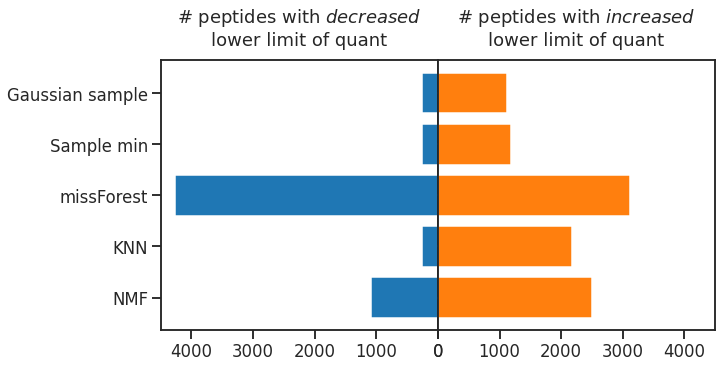

In [20]:
fig, axes = plt.subplots(figsize=(10,5), ncols=2, sharey=True, sharex=False)
fig.tight_layout()

axes[0].barh(data=lloq_plotter, y="method", width="n decrease", 
             label="decreased LLOQ", color="#1f77b4")
axes[0].set_title("# peptides with $\it{decreased}$ \nlower limit of quant", pad=15)
axes[0].set_xlim(left=0, right=4500)

axes[1].barh(data=lloq_plotter, y="method", width="n increase", 
             label="increased LLOQ", color="#ff7f0e")
axes[1].set_title("# peptides with $\it{increased}$ \nlower limit of quant", pad=15)
axes[1].set_xlim(left=0, right=4500)

# invert axis of left plot
axes[0].invert_xaxis() 
#axes[1].invert_xaxis() 

# disguise the right plot's ticks by setting them to the same color
    # as the left plot's bars
axes[1].tick_params(axis='y', colors='#1f77b4')

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)

#plt.show()
#plt.savefig("lloq-fig-alt.png", dpi=250, bbox_inches="tight")

In [12]:
lloq_plotter

,method,n decrease,n increase
0,NMF,1084,2498
1,KNN,261,2184
2,missForest,4260,3115
3,Sample min,252,1187
4,Gaussian sample,254,1126


***

## Can we add significance tests here?

In [13]:
# # if negative, NMF impute increased the LLOQ
# #    if positive, NMF impute decreased the LLOQ
# nmf_diffs = orig_loq - nmf_loq

# list(nmf_diffs)

#### Trying a basic significance thresholding idea

In [14]:
# # divide all the original LLOQs in half
# loq_thresholds = fom_orig["LOQ"] * 0.5

# # get the difference between orig LLOQs and NMF imputed LLOQs
# nmf_diffs = orig_loq - nmf_loq

# # figure out which NMF diffs are above the LLOQ threshold
# nmf_sig_diffs_bool = np.abs(nmf_diffs) > loq_thresholds

# # get the values associated with the diffs that pass the threshold
# nmf_sig_diffs = nmf_diffs[nmf_sig_diffs_bool]

# # if negative, NMF impute increased the LLOQ
# #    if positive, NMF impute decreased the LLOQ
# nmf_n_decrease = np.count_nonzero(nmf_sig_diffs > 0)
# nmf_n_increase = np.count_nonzero(nmf_sig_diffs < 0)

# print("n decrease: ", nmf_n_decrease)
# print("n increase: ", nmf_n_increase)